In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [28]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
kd_data = pd.read_csv('/content/gdrive/MyDrive/kidney_disease.csv')
print(kd_data.shape)


Mounted at /content/gdrive/
(329, 10)


In [29]:
kd_data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Heart Rate', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','class_label']


In [30]:
kd_feature_names = kd_data.columns[:-1]

kd_feature_number = len(kd_feature_names)

kd_features = kd_data.iloc[:,0:-1]
kd_data_cl_number = len(kd_data)


In [31]:
kd_data.describe()

,Pregnancies,Glucose,BloodPressure,Heart Rate,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class_label
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.240837,0.635717,0.579127,0.214301,0.106602,0.489131,0.177812,0.223759,0.440215,0.498480
std,0.207416,0.165684,0.148497,0.167121,0.156054,0.118597,0.148117,0.192474,0.153893,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107690,0.000000
25%,0.058824,0.512560,0.524590,0.000000,0.000000,0.420270,0.075149,0.066667,0.338460,0.000000
50%,0.176470,0.613070,0.590160,0.232320,0.057920,0.490310,0.132790,0.183330,0.430770,0.000000
75%,0.411760,0.738690,0.655740,0.333330,0.153660,0.552910,0.246370,0.350000,0.553850,1.000000
max,1.000000,1.000000,0.934430,1.000000,1.000000,1.000000,0.961140,0.816670,0.861540,1.000000


In [32]:
kd_data.duplicated().sum()
print("is duplicate:",kd_data.duplicated().sum())

print("is null:",kd_data.isnull().values.any())

print("maxmium values",kd_data.max(axis=0))
print("minimum values",kd_data.min(axis=0))

is duplicate: 0
is null: False
maxmium values Pregnancies                 1.00000
Glucose                     1.00000
BloodPressure               0.93443
Heart Rate                  1.00000
SkinThickness               1.00000
Insulin                     1.00000
BMI                         0.96114
DiabetesPedigreeFunction    0.81667
Age                         0.86154
class_label                 1.00000
dtype: float64
minimum values Pregnancies                 0.00000
Glucose                     0.00000
BloodPressure               0.00000
Heart Rate                  0.00000
SkinThickness               0.00000
Insulin                     0.00000
BMI                         0.00000
DiabetesPedigreeFunction    0.00000
Age                         0.10769
class_label                 0.00000
dtype: float64


0    165
1    164
Name: class_label, dtype: int64


Text(0.5, 0, 'Class Label')

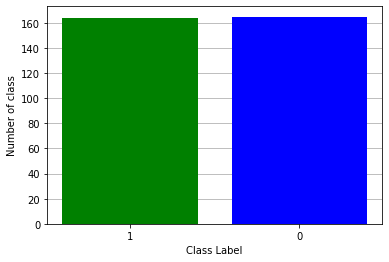

In [33]:
# distribution of class 0 and class 1
kd_label_counts = kd_data["class_label"].value_counts()
print(kd_label_counts)
unique_labels = kd_data["class_label"].unique()

fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(unique_labels, kd_label_counts, zorder=2,color=['blue', 'green'])
ax.set_xticks([0,1])
ax.set_xticklabels(unique_labels)
ax.set_ylabel("Number of class")
ax.set_xlabel("Class Label")

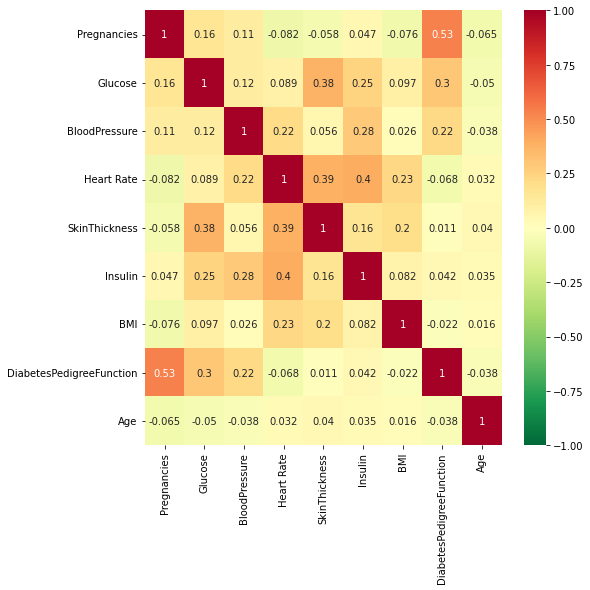

In [34]:
#draw heatmap of kidney disease
kd_corr = kd_features.corr() 
plt.figure(figsize=(8,8)) 
sns.heatmap(kd_corr, cmap='RdYlGn_r', annot=True, vmin=-1, vmax=1) 
plt.show()

Text(0, 0.5, 'Standard Deviation')

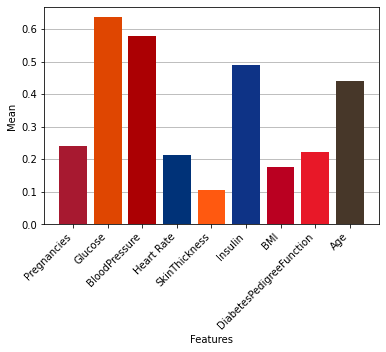

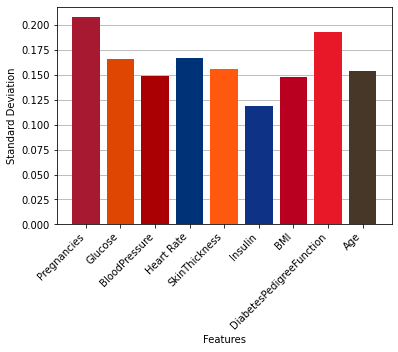

In [35]:

# Compute mean of each feature
means = kd_features.mean()

# Compute standard deviation of each feature
std = kd_features.std()

# Plot mean and standard deviation of each attribute
kd_colors=['#A71930', '#DF4601', '#AB0003', '#003278', '#FF5910', '#0E3386', '#BA0021', '#E81828', '#473729']
#, '#D31145', '#0C2340', '#005A9C', '#BD3039', '#EB6E1F', '#C41E3A', '#33006F', '#C6011F', '#004687', '#CE1141', '#134A8E', '#27251F', '#FDB827', '#0C2340', '#FD5A1E', '#00A3E0', '#ffc52f', '#003831', '#005C5C', '#E31937', '#8FBCE6']


fig, ax = plt.subplots()

ax.grid(zorder=1, axis="y")
ax.bar(kd_feature_names, means, zorder=2,color=kd_colors)
plt.xticks(rotation=45,ha='right')
ax.set_xlabel("Features")
ax.set_ylabel("Mean")


fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(kd_feature_names, std, zorder=2,color=kd_colors)
ax.set_xlabel("Features")
plt.xticks(rotation=45,ha='right')
ax.set_ylabel("Standard Deviation")

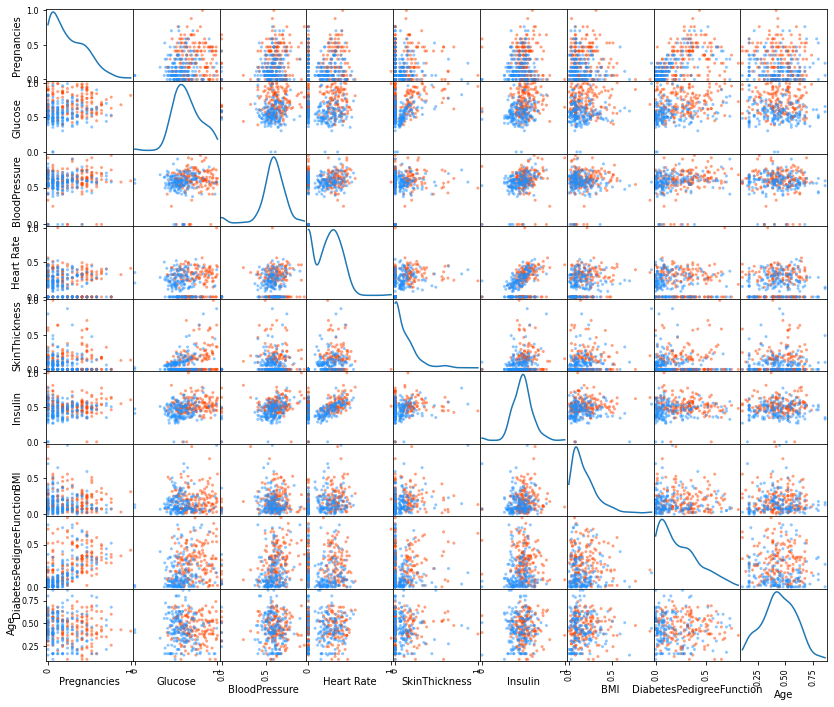

In [36]:
color = ['dodgerblue', 'orangered']
colors = kd_data['class_label'].map(lambda x: color[x])
pd.plotting.scatter_matrix(kd_features, figsize= (14, 12), diagonal='kde', color=colors);

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Heart Rate',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


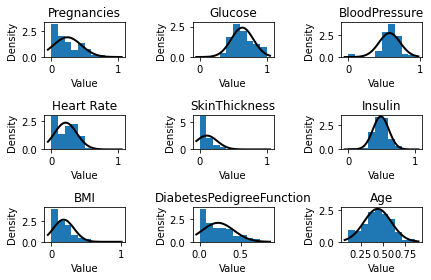

In [37]:
#distribution of features
def draw_distributon_graph(x_features,names):
  kd_normal_fig, axis = plt.subplots(3, 3)
  col = 0

  for x, ax in enumerate(axis.ravel()):
      ax.hist(x_features.loc[:, names[col]], density=True)
      mu, std = norm.fit(x_features.loc[:, names[col]])
      xmin, xmax = ax.get_xlim()
      x = np.linspace(xmin, xmax, 100)
      p = norm.pdf(x, mu, std)
      ax.plot(x, p, 'k', linewidth=2)
      ax.set_title(names[col])
      ax.set_xlabel("Value")
      ax.set_ylabel("Density")
      col += 1
  kd_normal_fig.tight_layout()

print(kd_feature_names)
draw_distributon_graph(kd_features,kd_feature_names)



(329, 9)
(329, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Heart Rate',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

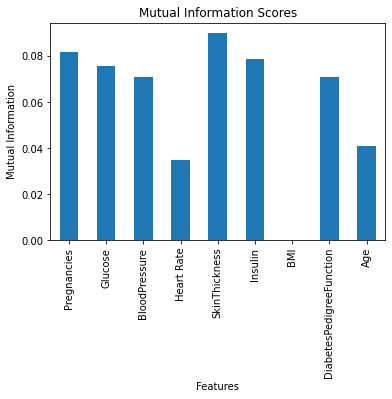

In [38]:
#mutual information
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

def plot_mutual_information(X, y, feature_names):
    mi_scores = mutual_info_classif(X, y)
    mi_scores_series = pd.Series(mi_scores, index=feature_names)
    mi_scores_series.plot(kind='bar')
    plt.title('Mutual Information Scores')
    plt.xlabel('Features')
    plt.ylabel('Mutual Information')
    return mi_scores_series.index.tolist()

kd_x =  kd_data.drop('class_label', axis=1).to_numpy()
kd_y = kd_data.to_numpy()[:, -1].reshape(-1,1)
print(kd_x.shape)
print(kd_y.shape)


plot_mutual_information(kd_x,kd_y,kd_data.columns [:-1])


(329, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Heart Rate',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
(329,)
[0.08160676 0.21521658 0.07359165 0.05590117 0.06448943 0.16692592
 0.09776524 0.15017762 0.09432563]


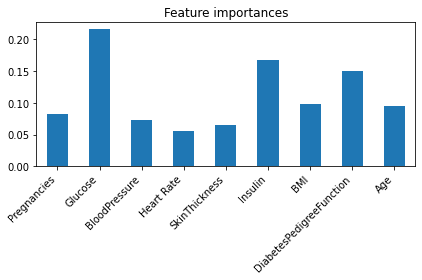

In [39]:
#feature importance
from sklearn.ensemble import RandomForestClassifier
print(kd_features.shape)
feature_names = kd_data.columns[:-1]
print(feature_names)
y = kd_data.to_numpy()[:, -1]
print(y.shape)
forest = RandomForestClassifier(random_state=0)
forest.fit(kd_features, y)

importances = forest.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

kd_colors=['#A71930', '#DF4601', '#AB0003', '#003278', '#FF5910', '#0E3386', '#BA0021', '#E81828', '#473729']
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.xticks(rotation=45,ha='right')
ax.set_title("Feature importances")
fig.tight_layout()

In [40]:
#implement RFE
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR


X = kd_features
y =  kd_data.to_numpy()[:, -1]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)
print(selector.support_)

print(selector.ranking_)

print(importances)

print('false indices:',np.where(selector.support_ == False)[0])
falseData = np.where(selector.support_ == False)[0];

print('final false features:',X.columns[falseData])


[ True  True  True False  True  True  True  True  True]
[1 1 1 2 1 1 1 1 1]
[0.08160676 0.21521658 0.07359165 0.05590117 0.06448943 0.16692592
 0.09776524 0.15017762 0.09432563]
false indices: [3]
final false features: Index(['Heart Rate'], dtype='object')
